## Analytics for Unstructured Data: Group Assignment #2

| **S.no** 	|    **Team Member**    	| **EID**|
|:--------:	|:---------------------:|:----:|
|     1    	|Amrit Pradhan|ap58785|
|     2    	|Deeksha Pandit|dp35222|
|     3    	|Meghna PM|mp49453|
|     4    	|Sanjo Shaju|ss99958|
|     5    	|Shivangi Dubey|scd2422|

## Task A

### Twitter scrapper

Twitter scrapper library used: 
https://github.com/JustAnotherArchivist/snscrape

In [ ]:
# Installing the library
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

import os
import pandas as pd

hashtag = ["2022Midterms", "PA2022", "PAGov2022","PaSenate","PASenate","PASen","MidtermElections","papolitics","RegisterToVote"] #hashtag to scrape
date_interval = ["2022-07-01", "2022-08-01", "2022-09-01", "2022-10-01"] #to ensure there are tweets from different month

arg = "twitter-hashtag"

data = None
for i in range(len(date_interval)-1):
    for hash in hashtag:
        os.system(
            f'snscrape --jsonl --progress --max-results 10000 --since {date_interval[i]} {arg} "{hash} until:{date_interval[i+1]}" > text-query-tweets.json')
        tweets_df = pd.read_json('text-query-tweets.json', lines=True)
        try:
            df = tweets_df[["id", "url", "date", "rawContent", "renderedContent",
                            "hashtags", "cashtags", "media", "lang","place","coordinates"]]
            if data is None:
                data = df
            else:
                data = data.append(df)
            print(f"{hash} ({date_interval[i]}->{date_interval[i+1]}): {len(df)} ")
        except:
            continue
        
data.to_csv("PA_election.csv",index=False) # storing the data so that we dont have to run the scrapper again

After scrapping an initial set of tweets we did an frequency analysis to identify other common hastags to scrape tweets from

In [ ]:
list3 = [item for sublist in data["hashtags"].to_numpy() for item in sublist]

cols = ["word", "count"]
lst = []
def countFreq(arr, n):

    mp = dict()
    for i in range(n):
        if arr[i] in mp.keys():
            mp[arr[i]] += 1
        else:
            mp[arr[i]] = 1

    for x in mp:
        lst.append([x, mp[x]])

countFreq(list3, len(list3))
df1 = pd.DataFrame(lst, columns=cols)
df1.sort_values(by=['count'],inplace=True, ascending=False)
df1.to_csv("commonlyusedhastags.csv",index=False)

In [3]:
import pandas as pd
import numpy as np
import re
import nltk

In [4]:
# Reading the tweets back
df_tweets = pd.read_csv("PA_election.csv")
df_tweets

,id,url,date,rawContent,renderedContent,hashtags,cashtags,media,lang,place,coordinates
0,1.55389E+18,https://twitter.com/NetBum1/status/15538906281...,2022-07-31 23:49:30+00:00,@adamcarolla @Timcast @pnjaban \n#2022MIDTERMS...,@adamcarolla @Timcast @pnjaban \n#2022MIDTERMS...,"['2022MIDTERMS', '2A', 'NOMOREGUNLAWS', 'REPEA...",NaN,NaN,qme,NaN,NaN
1,1.55389E+18,https://twitter.com/NetBum1/status/15538898974...,2022-07-31 23:46:36+00:00,@adamcarolla @Timcast @pnjaban\n@AnnCoulter\n ...,@adamcarolla @Timcast @pnjaban\n@AnnCoulter\n ...,"['2022MIDTERMS', '2A', 'BRINGBACKTRUMP', 'VOTE...",NaN,NaN,qme,NaN,NaN
2,1.55389E+18,https://twitter.com/todaysnews2go/status/15538...,2022-07-31 23:39:16+00:00,Private Prison Sues State for Not Having Enoug...,Private Prison Sues State for Not Having Enoug...,"['election', 'economy', '2022midterms']",NaN,NaN,en,NaN,NaN
3,1.55388E+18,https://twitter.com/drksingleton80/status/1553...,2022-07-31 23:07:41+00:00,Can we just admit that the American food lifes...,Can we just admit that the American food lifes...,"['Insulin4all', '2022midterms']",NaN,NaN,en,NaN,NaN
4,1.55387E+18,https://twitter.com/todaysnews2go/status/15538...,2022-07-31 22:39:19+00:00,Kudos To Karine https://t.co/2A2J86oSyq #infla...,Kudos To Karine bit.ly/3cItPUL #inflation #ele...,"['inflation', 'election', '2022midterms']",NaN,NaN,lt,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
21869,1.56515E+18,https://twitter.com/awokonewspaper/status/1565...,2022-09-01 01:21:34+00:00,"News is what we sell, not propaganda ... Get o...","News is what we sell, not propaganda ... Get o...","['SierraLeone', 'SaloneTwitter', 'Freetown', '...",NaN,"[{'_type': 'snscrape.modules.twitter.Photo', '...",en,NaN,NaN
21870,1.56514E+18,https://twitter.com/AlisonDeLuca/status/156514...,2022-09-01 00:55:32+00:00,https://t.co/SHwHufAGmK #RegisterToVote,IWillVote.com #RegisterToVote,['RegisterToVote'],NaN,NaN,qme,NaN,NaN
21871,1.56514E+18,https://twitter.com/KorbelRenoKia/status/15651...,2022-09-01 00:46:30+00:00,@allinwithchris @chrislhayes Wow. It only took...,@allinwithchris @chrislhayes Wow. It only took...,"['Alaska', 'RegisterToVote', 'VoteBlue2022']",NaN,NaN,en,NaN,NaN
21872,1.56514E+18,https://twitter.com/dittycommittee/status/1565...,2022-09-01 00:38:40+00:00,#RegisterToVote \n#VoteBlueToSaveDemocracy \n#...,#RegisterToVote \n#VoteBlueToSaveDemocracy \n#...,"['RegisterToVote', 'VoteBlueToSaveDemocracy', ...",NaN,NaN,qht,NaN,NaN


#### Data preprocessing

In [5]:
from nltk.tokenize import word_tokenize
# from spellchecker import SpellChecker

from multiprocessing import  Pool
from nltk.stem import WordNetLemmatizer 

# https://stackoverflow.com/a/34682849
def untokenize(words):
    """Untokenizing a text undoes the tokenizing operation, restoring
    punctuation and spaces to the places that people expect them to be.
    Ideally, `untokenize(tokenize(text))` should be identical to `text`,
    except for line breaks.
    """
    text = ' '.join(words)
    step1 = text.replace("`` ", '"').replace(" ''", '"').replace('. . .', '...')
    step2 = step1.replace(" ( ", " (").replace(" ) ", ") ")
    step3 = re.sub(r' ([.,:;?!%]+)([ \'"`])', r"\1\2", step2)
    step4 = re.sub(r' ([.,:;?!%]+)$', r"\1", step3)
    step5 = step4.replace(" '", "'").replace(" n't", "n't").replace(
        "can not", "cannot")
    step6 = step5.replace(" ` ", " '")
    return step6.strip()


# https://stackoverflow.com/a/47091490
def decontracted(phrase):
    """Convert contractions like "can't" into "can not"
    """
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    #phrase = re.sub(r"n't", " not", phrase) # resulted in "ca not" when sentence started with "can't"
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


# https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt
slang_abbrev_dict = {
    'AFAIK': 'As Far As I Know',
    'AFK': 'Away From Keyboard',
    'ASAP': 'As Soon As Possible',
    'ATK': 'At The Keyboard',
    'ATM': 'At The Moment',
    'A3': 'Anytime, Anywhere, Anyplace',
    'BAK': 'Back At Keyboard',
    'BBL': 'Be Back Later',
    'BBS': 'Be Back Soon',
    'BFN': 'Bye For Now',
    'B4N': 'Bye For Now',
    'BRB': 'Be Right Back',
    'BRT': 'Be Right There',
    'BTW': 'By The Way',
    'B4': 'Before',
    'B4N': 'Bye For Now',
    'CU': 'See You',
    'CUL8R': 'See You Later',
    'CYA': 'See You',
    'FAQ': 'Frequently Asked Questions',
    'FC': 'Fingers Crossed',
    'FWIW': 'For What It\'s Worth',
    'FYI': 'For Your Information',
    'GAL': 'Get A Life',
    'GG': 'Good Game',
    'GN': 'Good Night',
    'GMTA': 'Great Minds Think Alike',
    'GR8': 'Great!',
    'G9': 'Genius',
    'IC': 'I See',
    'ICQ': 'I Seek you',
    'ILU': 'I Love You',
    'IMHO': 'In My Humble Opinion',
    'IMO': 'In My Opinion',
    'IOW': 'In Other Words',
    'IRL': 'In Real Life',
    'KISS': 'Keep It Simple, Stupid',
    'LDR': 'Long Distance Relationship',
    'LMAO': 'Laugh My Ass Off',
    'LOL': 'Laughing Out Loud',
    'LTNS': 'Long Time No See',
    'L8R': 'Later',
    'MTE': 'My Thoughts Exactly',
    'M8': 'Mate',
    'NRN': 'No Reply Necessary',
    'OIC': 'Oh I See',
    'OMG': 'Oh My God',
    'PITA': 'Pain In The Ass',
    'PRT': 'Party',
    'PRW': 'Parents Are Watching',
    'QPSA?': 'Que Pasa?',
    'ROFL': 'Rolling On The Floor Laughing',
    'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
    'ROTFLMAO': 'Rolling On The Floor Laughing My Ass Off',
    'SK8': 'Skate',
    'STATS': 'Your sex and age',
    'ASL': 'Age, Sex, Location',
    'THX': 'Thank You',
    'TTFN': 'Ta-Ta For Now!',
    'TTYL': 'Talk To You Later',
    'U': 'You',
    'U2': 'You Too',
    'U4E': 'Yours For Ever',
    'WB': 'Welcome Back',
    'WTF': 'What The Fuck',
    'WTG': 'Way To Go!',
    'WUF': 'Where Are You From?',
    'W8': 'Wait',
    '7K': 'Sick:-D Laugher'
}


def unslang(text):
    """Converts text like "OMG" into "Oh my God"
    """
    if text.upper() in slang_abbrev_dict.keys():
        return slang_abbrev_dict[text.upper()]
    else:
        return text


# https://gist.github.com/sebleier/554280
stopwords = [
    "a", "about", "above", "after", "again", "against", "ain", "all", "am",
    "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because",
    "been", "before", "being", "below", "between", "both", "but", "by", "can",
    "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn",
    "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for",
    "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have",
    "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him",
    "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't",
    "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn",
    "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn",
    "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once",
    "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own",
    "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've",
    "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that",
    "that'll", "the", "their", "theirs", "them", "themselves", "then", "there",
    "these", "they", "this", "those", "through", "to", "too", "under", "until",
    "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren",
    "weren't", "what", "when", "where", "which", "while", "who", "whom", "why",
    "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd",
    "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves",
    "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm",
    "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd",
    "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've",
    "what's", "when's", "where's", "who's", "why's", "would", "able", "abst",
    "accordance", "according", "accordingly", "across", "act", "actually",
    "added", "adj", "affected", "affecting", "affects", "afterwards", "ah",
    "almost", "alone", "along", "already", "also", "although", "always",
    "among", "amongst", "announce", "another", "anybody", "anyhow", "anymore",
    "anyone", "anything", "anyway", "anyways", "anywhere", "apparently",
    "approximately", "arent", "arise", "around", "aside", "ask", "asking",
    "auth", "available", "away", "awfully", "b", "back", "became", "become",
    "becomes", "becoming", "beforehand", "begin", "beginning", "beginnings",
    "begins", "behind", "believe", "beside", "besides", "beyond", "biol",
    "brief", "briefly", "c", "ca", "came", "cannot", "can't", "cause", "causes",
    "certain", "certainly", "co", "com", "come", "comes", "contain",
    "containing", "contains", "couldnt", "date", "different", "done",
    "downwards", "due", "e", "ed", "edu", "effect", "eg", "eight", "eighty",
    "either", "else", "elsewhere", "end", "ending", "enough", "especially",
    "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything",
    "everywhere", "ex", "except", "f", "far", "ff", "fifth", "first", "five",
    "fix", "followed", "following", "follows", "former", "formerly", "forth",
    "found", "four", "furthermore", "g", "gave", "get", "gets", "getting",
    "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten",
    "h", "happens", "hardly", "hed", "hence", "hereafter", "hereby", "herein",
    "heres", "hereupon", "hes", "hi", "hid", "hither", "home", "howbeit",
    "however", "hundred", "id", "ie", "im", "immediate", "immediately",
    "importance", "important", "inc", "indeed", "index", "information",
    "instead", "invention", "inward", "itd", "it'll", "j", "k", "keep", "keeps",
    "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last",
    "lately", "later", "latter", "latterly", "least", "less", "lest", "let",
    "lets", "like", "liked", "likely", "line", "little", "'ll", "look",
    "looking", "looks", "ltd", "made", "mainly", "make", "makes", "many", "may",
    "maybe", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might",
    "million", "miss", "ml", "moreover", "mostly", "mr", "mrs", "much", "mug",
    "must", "n", "na", "name", "namely", "nay", "nd", "near", "nearly",
    "necessarily", "necessary", "need", "needs", "neither", "never",
    "nevertheless", "new", "next", "nine", "ninety", "nobody", "non", "none",
    "nonetheless", "noone", "normally", "nos", "noted", "nothing", "nowhere",
    "obtain", "obtained", "obviously", "often", "oh", "ok", "okay", "old",
    "omitted", "one", "ones", "onto", "ord", "others", "otherwise", "outside",
    "overall", "owing", "p", "page", "pages", "part", "particular",
    "particularly", "past", "per", "perhaps", "placed", "please", "plus",
    "poorly", "possible", "possibly", "potentially", "pp", "predominantly",
    "present", "previously", "primarily", "probably", "promptly", "proud",
    "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran",
    "rather", "rd", "readily", "really", "recent", "recently", "ref", "refs",
    "regarding", "regardless", "regards", "related", "relatively", "research",
    "respectively", "resulted", "resulting", "results", "right", "run", "said",
    "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem",
    "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven",
    "several", "shall", "shed", "shes", "show", "showed", "shown", "showns",
    "shows", "significant", "significantly", "similar", "similarly", "since",
    "six", "slightly", "somebody", "somehow", "someone", "somethan",
    "something", "sometime", "sometimes", "somewhat", "somewhere", "soon",
    "sorry", "specifically", "specified", "specify", "specifying", "still",
    "stop", "strongly", "sub", "substantially", "successfully", "sufficiently",
    "suggest", "sup", "sure", "take", "taken", "taking", "tell", "tends", "th",
    "thank", "thanks", "thanx", "thats", "that've", "thence", "thereafter",
    "thereby", "thered", "therefore", "therein", "there'll", "thereof",
    "therere", "theres", "thereto", "thereupon", "there've", "theyd", "theyre",
    "think", "thou", "though", "thoughh", "thousand", "throug", "throughout",
    "thru", "thus", "til", "tip", "together", "took", "toward", "towards",
    "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un",
    "unfortunately", "unless", "unlike", "unlikely", "unto", "upon", "ups",
    "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using",
    "usually", "v", "value", "various", "'ve", "via", "viz", "vol", "vols",
    "vs", "w", "want", "wants", "wasnt", "way", "wed", "welcome", "went",
    "werent", "whatever", "what'll", "whats", "whence", "whenever",
    "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon",
    "wherever", "whether", "whim", "whither", "whod", "whoever", "whole",
    "who'll", "whomever", "whos", "whose", "widely", "willing", "wish",
    "within", "without", "wont", "words", "world", "wouldnt", "www", "x", "yes",
    "yet", "youd", "youre", "z", "zero", "a's", "ain't", "allow", "allows",
    "apart", "appear", "appreciate", "appropriate", "associated", "best",
    "better", "c'mon", "c's", "cant", "changes", "clearly", "concerning",
    "consequently", "consider", "considering", "corresponding", "course",
    "currently", "definitely", "described", "despite", "entirely", "exactly",
    "example", "going", "greetings", "hello", "help", "hopefully", "ignored",
    "inasmuch", "indicate", "indicated", "indicates", "inner", "insofar",
    "it'd", "keep", "keeps", "novel", "presumably", "reasonably", "second",
    "secondly", "sensible", "serious", "seriously", "sure", "t's", "third",
    "thorough", "thoroughly", "three", "well", "wonder", "a", "about", "above",
    "above", "across", "after", "afterwards", "again", "against", "all",
    "almost", "alone", "along", "already", "also", "although", "always", "am",
    "among", "amongst", "amoungst", "amount", "an", "and", "another", "any",
    "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as",
    "at", "back", "be", "became", "because", "become", "becomes", "becoming",
    "been", "before", "beforehand", "behind", "being", "below", "beside",
    "besides", "between", "beyond", "bill", "both", "bottom", "but", "by",
    "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry",
    "de", "describe", "detail", "do", "done", "down", "due", "during", "each",
    "eg", "eight", "either", "eleven", "else", "elsewhere", "empty", "enough",
    "etc", "even", "ever", "every", "everyone", "everything", "everywhere",
    "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five",
    "for", "former", "formerly", "forty", "found", "four", "from", "front",
    "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he",
    "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers",
    "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if",
    "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself",
    "keep", "last", "latter", "latterly", "least", "less", "ltd", "made",
    "many", "may", "me", "meanwhile", "might", "mill", "mine", "more",
    "moreover", "most", "mostly", "move", "much", "must", "my", "myself",
    "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no",
    "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of",
    "off", "often", "on", "once", "one", "only", "onto", "or", "other",
    "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own",
    "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see",
    "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should",
    "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow",
    "someone", "something", "sometime", "sometimes", "somewhere", "still",
    "such", "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thickv", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within",
    "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves",
    "the", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n",
    "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C",
    "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R",
    "S", "T", "U", "V", "W", "X", "Y", "Z", "co", "op", "research-articl",
    "pagecount", "cit", "ibid", "les", "le", "au", "que", "est", "pas", "vol",
    "el", "los", "pp", "u201d", "well-b", "http", "volumtype", "par", "0o",
    "0s", "3a", "3b", "3d", "6b", "6o", "a1", "a2", "a3", "a4", "ab", "ac",
    "ad", "ae", "af", "ag", "aj", "al", "an", "ao", "ap", "ar", "av", "aw",
    "ax", "ay", "az", "b1", "b2", "b3", "ba", "bc", "bd", "be", "bi", "bj",
    "bk", "bl", "bn", "bp", "br", "bs", "bt", "bu", "bx", "c1", "c2", "c3",
    "cc", "cd", "ce", "cf", "cg", "ch", "ci", "cj", "cl", "cm", "cn", "cp",
    "cq", "cr", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d2", "da", "dc",
    "dd", "de", "df", "di", "dj", "dk", "dl", "do", "dp", "dr", "ds", "dt",
    "du", "dx", "dy", "e2", "e3", "ea", "ec", "ed", "ee", "ef", "ei", "ej",
    "el", "em", "en", "eo", "ep", "eq", "er", "es", "et", "eu", "ev", "ex",
    "ey", "f2", "fa", "fc", "ff", "fi", "fj", "fl", "fn", "fo", "fr", "fs",
    "ft", "fu", "fy", "ga", "ge", "gi", "gj", "gl", "go", "gr", "gs", "gy",
    "h2", "h3", "hh", "hi", "hj", "ho", "hr", "hs", "hu", "hy", "i", "i2", "i3",
    "i4", "i6", "i7", "i8", "ia", "ib", "ic", "ie", "ig", "ih", "ii", "ij",
    "il", "in", "io", "ip", "iq", "ir", "iv", "ix", "iy", "iz", "jj", "jr",
    "js", "jt", "ju", "ke", "kg", "kj", "km", "ko", "l2", "la", "lb", "lc",
    "lf", "lj", "ln", "lo", "lr", "ls", "lt", "m2", "ml", "mn", "mo", "ms",
    "mt", "mu", "n2", "nc", "nd", "ne", "ng", "ni", "nj", "nl", "nn", "nr",
    "ns", "nt", "ny", "oa", "ob", "oc", "od", "of", "og", "oi", "oj", "ol",
    "om", "on", "oo", "oq", "or", "os", "ot", "ou", "ow", "ox", "oz", "p1",
    "p2", "p3", "pc", "pd", "pe", "pf", "ph", "pi", "pj", "pk", "pl", "pm",
    "pn", "po", "pq", "pr", "ps", "pt", "pu", "py", "qj", "qu", "r2", "ra",
    "rc", "rd", "rf", "rh", "ri", "rj", "rl", "rm", "rn", "ro", "rq", "rr",
    "rs", "rt", "ru", "rv", "ry", "s2", "sa", "sc", "sd", "se", "sf", "si",
    "sj", "sl", "sm", "sn", "sp", "sq", "sr", "ss", "st", "sy", "sz", "t1",
    "t2", "t3", "tb", "tc", "td", "te", "tf", "th", "ti", "tj", "tl", "tm",
    "tn", "tp", "tq", "tr", "ts", "tt", "tv", "tx", "ue", "ui", "uj", "uk",
    "um", "un", "uo", "ur", "ut", "va", "wa", "vd", "wi", "vj", "vo", "wo",
    "vq", "vt", "vu", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn",
    "xo", "xs", "xt", "xv", "xx", "y2", "yj", "yl", "yr", "ys", "yt", "zi", "zz"
]


# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# from: https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove
# maybe a bug, it removes question marks?
# spell = SpellChecker()

def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

def remove_urls(text):
    text = clean(r"http\S+", text)
    text = clean(r"www\S+", text)
    text = clean(r"pic.twitter.com\S+", text)

    return text

def clean(reg_exp, text):
    text = re.sub(reg_exp, " ", text)

    # replace multiple spaces with one.
    text = re.sub('\s{2,}', ' ', text)

    return text

lemmatizer = WordNetLemmatizer()

def clean_all(t, correct_spelling=False, remove_stopwords=True, lemmatize=True):
    try:
        # To lowercase
        t = t.lower()
        
        # first do bulk cleanup on tokens that don't depend on word tokenization

        # remove xml tags
        t = clean(r"<[^>]+>", t)
        t = clean(r"&lt;", t)
        t = clean(r"&gt;", t)

        # remove URLs
        t = remove_urls(t)

        # https://stackoverflow.com/a/35041925
        # replace multiple punctuation with single. Ex: !?!?!? would become ?
        t = clean(r'[\?\.\!]+(?=[\?\.\!])', t)

        t = remove_emoji(t)

        # expand common contractions like "I'm" "he'll"
        t = decontracted(t)

        # now remove/expand bad patterns per word
        words = word_tokenize(t)

        # remove stopwords
        if remove_stopwords is True:
            words = [w for w in words if not w in stopwords]

        clean_words = []

        for w in words:
            # normalize punctuation
            w = re.sub(r'&', 'and', w)

            # expand slang like OMG = Oh my God
            w = unslang(w)

            if lemmatize is True:
                w = lemmatizer.lemmatize(w)
            
            clean_words.append(w)

        # join the words back into a full string
        t = untokenize(clean_words)

        if correct_spelling is True:
            # this resulted in lots of lost punctuation - omitting for now. Also greatly speeds things up
            t = correct_spellings(t)

        # finally, remove any non ascii and special characters that made it through
        t = clean(r"[^A-Za-z0-9\.\'!\?,\$]", t)
    except:
        return t

    return t


def clean_dataframe(df, correct_spelling=False, remove_stopwords=True):
    df['clean'] = df.apply(lambda x: clean_all(x['renderedContent'], correct_spelling=correct_spelling, remove_stopwords=remove_stopwords), axis=1)

    return df


# https://towardsdatascience.com/make-your-own-super-pandas-using-multiproc-1c04f41944a1
def parallelize_dataframe(
        df, func, n_cores=2):  # I think Kaggle notebooks only have 2 cores?
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()

    return df

In [6]:
import ast
df_temp_tweets = df_tweets.copy()
# Clean the tweets
df_temp_tweets['clean'] = df_temp_tweets.apply(lambda x: clean_all(x['renderedContent']), axis=1)
# Clean the place data
df_temp_tweets['place'] = df_temp_tweets['place'].fillna('').apply(lambda x: ast.literal_eval(x)['fullName'] if x != "" else "")

df_temp_tweets = df_temp_tweets[['renderedContent', 'clean','place']]
df_temp_tweets.dropna(inplace=True)
# df_temp_tweets.to_csv("csv_test.csv",index=False)

Replacing the city/town names with "smalltownpa" and "bigtownpa" keyword

In [7]:
df_replace = pd.read_csv('city_town_classifier.csv')
town_map = dict(zip(df_replace.Town, df_replace.Replacement))
town_map

{'Aliquippa': 'smalltownpa',
 'Allentown': 'bigtownpa',
 'Altoona': 'smalltownpa',
 'Arnold': 'smalltownpa',
 'Beaver Falls': 'smalltownpa',
 'Bethlehem': 'smalltownpa',
 'Bloomsburg': 'smalltownpa',
 'Bradford': 'smalltownpa',
 'Butler': 'smalltownpa',
 'Carbondale': 'smalltownpa',
 'Chester': 'smalltownpa',
 'Clairton': 'smalltownpa',
 'Coatesville': 'smalltownpa',
 'Connellsville': 'smalltownpa',
 'Corry': 'smalltownpa',
 'Du Bois': 'smalltownpa',
 'Duquesne': 'smalltownpa',
 'Easton': 'smalltownpa',
 'Erie': 'bigtownpa',
 'Farrell': 'smalltownpa',
 'Franklin': 'smalltownpa',
 'Greensburg': 'smalltownpa',
 'Harrisburg': 'smalltownpa',
 'Hazleton': 'smalltownpa',
 'Hermitage': 'smalltownpa',
 'Jeannette': 'smalltownpa',
 'Johnstown': 'smalltownpa',
 'Lancaster': 'smalltownpa',
 'Latrobe': 'smalltownpa',
 'Lebanon': 'smalltownpa',
 'Lock Haven': 'smalltownpa',
 'Lower Burrell': 'smalltownpa',
 'McCandless': 'smalltownpa',
 'McKeesport': 'smalltownpa',
 'Meadville': 'smalltownpa',
 'Mo

In [8]:
town_map = {'Aliquippa': 'smalltownpa','Allentown': 'bigtownpa','Altoona': 'smalltownpa','Arnold': 'smalltownpa','Beaver Falls': 'smalltownpa','Bethlehem': 'smalltownpa','Bloomsburg': 'smalltownpa','Bradford': 'smalltownpa','Butler': 'smalltownpa','Carbondale': 'smalltownpa','Chester': 'smalltownpa','Clairton': 'smalltownpa','Coatesville': 'smalltownpa','Connellsville': 'smalltownpa','Corry': 'smalltownpa','Du Bois': 'smalltownpa','Duquesne': 'smalltownpa','Easton': 'smalltownpa','Erie': 'bigtownpa','Farrell': 'smalltownpa','Franklin': 'smalltownpa','Greensburg': 'smalltownpa','Harrisburg': 'smalltownpa','Hazleton': 'smalltownpa','Hermitage': 'smalltownpa','Jeannette': 'smalltownpa',
                'Johnstown': 'smalltownpa','Lancaster': 'smalltownpa','Latrobe': 'smalltownpa','Lebanon': 'smalltownpa','Lock Haven': 'smalltownpa','Lower Burrell': 'smalltownpa','McCandless': 'smalltownpa','McKeesport': 'smalltownpa','Meadville': 'smalltownpa','Monessen': 'smalltownpa','Monongahela': 'smalltownpa','Nanticoke': 'smalltownpa','New Castle': 'smalltownpa','New Kensington': 'smalltownpa','Oil City': 'smalltownpa','Parker': 'smalltownpa','Philadelphia': 'bigtownpa','Pittsburgh': 'bigtownpa','Pittston': 'smalltownpa','Pottsville': 'smalltownpa','Reading': 'bigtownpa',
                'St. Marys': 'smalltownpa','Scranton': 'smalltownpa','Shamokin': 'smalltownpa','Sharon': 'smalltownpa','Sunbury': 'smalltownpa','Titusville': 'smalltownpa','Uniontown': 'smalltownpa','Warren': 'smalltownpa','Washington': 'smalltownpa','Wilkes-Barre': 'smalltownpa','Williamsport': 'smalltownpa','York': 'smalltownpa'}

In [9]:
# city_town_classifier.csv has the info on how we classified towns/city to small or big ones in PA
# df_replace = pd.read_csv('city_town_classifier.csv')
# town_map = dict(zip(df_replace.Town, df_replace.Replacement))

def replace(match):
    return town_map[match.group(0)]

def replace_town_names(text):
    text = re.sub('|'.join(r'\b%s\b' % re.escape(s) for s in town_map), replace, text)
    if text[:-4] in ['smalltownpa','bigtownpa']:
        return text[:-4]
    else:
        return ''

# Adding the location keywords to the tweets
df_temp_tweets['town'] = df_temp_tweets['place'].map(replace_town_names)
df_temp_tweets['clean'] = df_temp_tweets['clean'].map(str) + " " + df_temp_tweets['town'].map(str)

df_temp_tweets = df_temp_tweets[['renderedContent', 'clean']]
# df_temp_tweets

### Word Frequency

In [10]:
# Count frequency of words from all the scrapped comments
comments_combined = df_temp_tweets['clean'].str.cat(sep=' ')
comments_combined=re.sub(r'[^\w\s]', '', comments_combined)
words = nltk.tokenize.word_tokenize(comments_combined)
word_dist = nltk.FreqDist(words)
df_freq = pd.DataFrame(word_dist.items(), columns=['word', 'count']).sort_values(by = 'count', ascending = False)
df_freq.insert(0, 'Rank', range(1, 1 + len(df_freq)))

# storing the word frequencies to excel as backup.
df_freq.to_csv('Word_freq.csv',index=False)

df_freq

,Rank,word,count
288,1,registertovote,9460
289,2,vote,5568
395,3,pasen,5421
3,4,2022midterms,3572
23,5,election,2353
...,...,...,...
4395,39852,deposit,1
4396,39853,exploring,1
21476,39854,marginoffraud,1
21475,39855,turnbigly,1


Replacing various keywords related to Fetterman and Oz to just "fetterman" and "oz" keywords which we will be using to do the lift analysis

In [11]:
contestant_map = {'johnfetterman':'fetterman','john':'fetterman','fettermanforsenate':'fetterman','teamfetterman':'fetterman',
                    'fettermanisthebetterman':'fetterman','fetterman2022':'fetterman','giselefetterman':'fetterman','levifetterman':'fetterman',
                    'votefetterman':'fetterman','fettermanpa':'fetterman','johnfettermancom':'fetterman','fettermanforpa':'fetterman',
                    'vote4fetterman':'fetterman','seniors4fetterman':'fetterman','johnfettermanpa':'fetterman','johnfettermanforpa':'fetterman',
                    'flushfetterman':'fetterman','johnfettermanforsenate':'fetterman','fettermanthebetterman':'fetterman','fettermanisafraud':'fetterman',
                    'votejohnfetterman':'fetterman','fetterman4pa':'fetterman','votefettermanthebetterman':'fetterman','wheresfetterman':'fetterman',
                    'droz':'oz','mehmet':'oz','mehmetoz':'oz','noozhere':'oz','mehmetoz':'oz','stopoz':'oz','notoz':'oz','doctorozcom':'oz,',
                    'rejectoz':'oz','nooz':'oz','ozforsenate':'oz','ozforpa':'oz','newjerseyoz':'oz','ozsucks':'oz','drozforsenate':'oz',
                    'voteoz':'oz','teamoz':'oz','drmehmetoz':'oz','ozisafraud':'oz','sendozbacktonj':'oz','drozfornj':'oz','ozthefraud':'oz',
                    'notodroz':'oz','mehoz':'oz','jerseyoz':'oz','doctoroz':'oz','ozfornj':'oz','drozisafraud':'oz','oz4sen':'oz'}

import re

def replace(match):
    return contestant_map[match.group(0)]

def replace_contestant_names_with_similar_ones(text):
    text = re.sub('|'.join(r'\b%s\b' % re.escape(s) for s in contestant_map), replace, text)
    return text

df_temp_tweets['clean'] = df_temp_tweets['clean'].map(replace_contestant_names_with_similar_ones)
df_temp_tweets

,renderedContent,clean
0,@adamcarolla @Timcast @pnjaban \n#2022MIDTERMS...,adamcarolla timcast pnjaban 2022midterms 2a s...
1,@adamcarolla @Timcast @pnjaban\n@AnnCoulter\n ...,adamcarolla timcast pnjaban anncoulter senate...
2,Private Prison Sues State for Not Having Enoug...,private prison sue state prisoner wondergressi...
3,Can we just admit that the American food lifes...,admit american food lifestyle promotes diabete...
4,Kudos To Karine bit.ly/3cItPUL #inflation #ele...,kudos karine bit.ly 3citpul inflation election...
...,...,...
21869,"News is what we sell, not propaganda ... Get o...","news sell, propaganda. e paper straight phone ..."
21870,IWillVote.com #RegisterToVote,iwillvote.com registertovote
21871,@allinwithchris @chrislhayes Wow. It only took...,allinwithchris chrislhayes wow. 63 year. cong...
21872,#RegisterToVote \n#VoteBlueToSaveDemocracy \n#...,registertovote votebluetosavedemocracy votebl...


## Task B
#### Getting the top for issues

In [12]:
# Calculate unique word frequency, keeping words unique for a single comment ie, is Fetterman appear twice in a comment for that comment frequency of Fetterman will be taken as 1
def unique_freq(Series):
    
    y = Series.map(lambda x: list(set(x.lstrip('"').rstrip('"').split())))

    wordlists_list = list(y)
    freq_dict = {}
    for i in range (len(wordlists_list)):
        for j in range(len(wordlists_list[i])):
            if wordlists_list[i][j] in freq_dict:
                freq_dict[wordlists_list[i][j]] = freq_dict[wordlists_list[i][j]] + 1
            else:
                freq_dict[wordlists_list[i][j]] = 1

    uniq_freq = pd.DataFrame(list(freq_dict.items()),columns = ['word','count']).set_index('word')
    return uniq_freq

# using above function to get unique word frequencies on Text_clean which has no stopwords and models replaced with
#brands. This result can be used to determine our top 4 issues.

df_unique_freq = unique_freq(df_temp_tweets['clean']).sort_values(by = 'count', ascending = False)
df_unique_freq.to_csv('Unique_Word_freq.csv')
df_unique_freq[:10]

,count
word,
registertovote,8947
pasen,5222
vote,3486
2022midterms,3310
fetterman,2695
midtermelections,1905
and,1762
amp,1711
oz,1685


Top 4 issues we found are:
* inflation
* abortion
* crime
* job

## Task D
#### Find Lift and Sentiment for contestant vs issues

### Calculate the lift values: Contestants vs Issues

In [13]:
# This function takes a string, a list, dataframe from which a column with comments is specified and freq_series which has 
# the word unique frequencies and returns lift values of the string with all the values present in the list

def lift(string, string_list,dataf,column,freq_series):
    nrows = float(len(dataf))
    string_n = float(freq_series.loc[string])
    string_mask = dataf[column].str.contains(string)
    lift_list = []
    for items in string_list:
        if string == items:
            lift_list.append('NA')
        else:
            string_list_n = float(freq_series.loc[items])
            mel_count = float(dataf[string_mask][column].str.contains(items).sum())
            lift = (nrows * mel_count)/(string_n * string_list_n)
            lift_list.append(lift)
    
    return lift_list

issue_list = ['inflation','abortion','crime','job']
contestants = ['fetterman','oz']

from time import sleep
lift_dict = {}
for i in range(len(contestants)):
    lift_dict[contestants[i]] = lift(contestants[i], issue_list,df_temp_tweets,'clean',df_unique_freq)


issues_lift = pd.DataFrame.from_dict(lift_dict)
issues_lift.index = issue_list
issues_lift = issues_lift.T
issues_lift

,inflation,abortion,crime,job
fetterman,0.222899,1.268147,3.399431,2.254484
oz,0.209709,1.582060,1.427231,1.854430


Couple of things to remark basis the above Lift association. We will just highlight the observations here and would wish to map it with actual inferences and insights at the end of the file so the story stiches out well - 

* There is a marked high Lift value (~3.4)between Fetterman and Crime
* For Dr. Oz, there is a relatively high Lift value with Abortion and Jobs (may be generalized to economy) too 

### Sentiment ###
Found the sentiment for every tweets, then filter out tweets with the contestant and issue related keywords and get the average of the sentiments of that tweets

In [14]:
# Creating a dictionary of the keywords required to form the output dataframe for lift comparison
issues_dict_temp = issues_lift.to_dict()
issues_dict = {}
for key in issues_dict_temp:
    for k in issues_dict_temp[key]:
        issues_dict[key + "," +k]=issues_dict_temp[key][k]

df_issues = pd.DataFrame.from_dict(issues_dict, orient='index', columns=['Lift'])
df_issues.index

Index(['inflation,fetterman', 'inflation,oz', 'abortion,fetterman',
       'abortion,oz', 'crime,fetterman', 'crime,oz', 'job,fetterman',
       'job,oz'],
      dtype='object')

In [15]:
# Finding the sentiment for all the tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

new_words = {
    'oz': 0,
    'fetterman': 0,
    'smalltownpa':0,
    'bigtownpa':0
}

sent_analyser = SentimentIntensityAnalyzer()
sent_analyser.lexicon.update(new_words)
def sentiment(text):
    return (sent_analyser.polarity_scores(text)["compound"])

df_temp_tweets['Polarity'] = df_temp_tweets['clean'].map(sentiment)
df_temp_tweets

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sanjoshaju/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,renderedContent,clean,Polarity
0,@adamcarolla @Timcast @pnjaban \n#2022MIDTERMS...,adamcarolla timcast pnjaban 2022midterms 2a s...,0.0000
1,@adamcarolla @Timcast @pnjaban\n@AnnCoulter\n ...,adamcarolla timcast pnjaban anncoulter senate...,0.0000
2,Private Prison Sues State for Not Having Enoug...,private prison sue state prisoner wondergressi...,-0.7783
3,Can we just admit that the American food lifes...,admit american food lifestyle promotes diabete...,-0.5994
4,Kudos To Karine bit.ly/3cItPUL #inflation #ele...,kudos karine bit.ly 3citpul inflation election...,0.5106
...,...,...,...
21869,"News is what we sell, not propaganda ... Get o...","news sell, propaganda. e paper straight phone ...",0.4939
21870,IWillVote.com #RegisterToVote,iwillvote.com registertovote,0.0000
21871,@allinwithchris @chrislhayes Wow. It only took...,allinwithchris chrislhayes wow. 63 year. cong...,0.7783
21872,#RegisterToVote \n#VoteBlueToSaveDemocracy \n#...,registertovote votebluetosavedemocracy votebl...,0.0000


Categorizing the tweets to sentiment based on the polarity

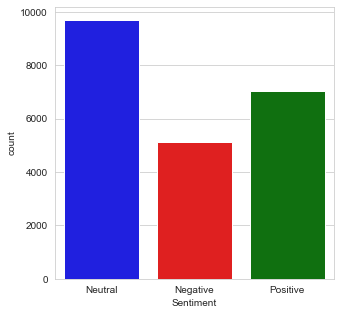

In [17]:
def senti(data):
    if data >= 0.05:
        val = "Positive"
    elif data <= -0.05:
        val = "Negative"
    else:
        val = "Neutral"
    return val

df_temp_tweets['Sentiment'] = df_temp_tweets['Polarity'].map(senti)

from sklearn.manifold import MDS
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment", data=df_temp_tweets, 
                  palette=dict(Neutral="blue", Positive="Green", Negative="Red"))

Creating the Lift and sentiment output dataframe

In [23]:
def tokenize_text(text):
    return nltk.tokenize.word_tokenize(text)
df_temp_tweets['clean_tokenized'] = df_temp_tweets['clean'].map(tokenize_text)
df_temp_tweets

def filter_fn(row, t):
    t = t.split(",")
    if all(x in row['clean_tokenized'] for x in t):
        return True
    else:
        return False
        
def find_sentiment(text):
    m = df_temp_tweets.apply(lambda x: filter_fn(x, text), axis=1)
    df1 = df_temp_tweets[m]

    return df1["Polarity"].mean()

df_issues["Polarity"] = df_issues.index.map(find_sentiment)
df_issues['Sentiment'] = df_issues['Polarity'].map(senti)

df_issues.loc[df_issues['Lift'] < 1, 'Polarity'] = np.nan
df_issues.loc[df_issues['Lift'] < 1, 'Sentiment'] = np.nan

df_issues


,Lift,Polarity,Sentiment
"inflation,fetterman",0.222899,NaN,NaN
"inflation,oz",0.209709,NaN,NaN
"abortion,fetterman",1.268147,-0.100063,Negative
"abortion,oz",1.582060,-0.400726,Negative
"crime,fetterman",3.399431,-0.684062,Negative
"crime,oz",1.427231,-0.506547,Negative
"job,fetterman",2.254484,0.007070,Neutral
"job,oz",1.854430,-0.090436,Negative


Couple of things to remark basis the above Lift and Sentiment association. Like Lift, we will just highlight the observations here and would wish to map it with actual inferences and insights at the end of the file so the story stiches out well - 

* There is a marked high Lift value (~3.4) backed up by negative sentiment between Fetterman and Crime
* For Dr. Oz, there is a relatively high Lift value with Abortion and backed up by negative sentiment
* The only 'neutral' sentiment depicted is by the association between Fetterman and Jobs

## Task E

### MDS plot: Contestants vs Issues

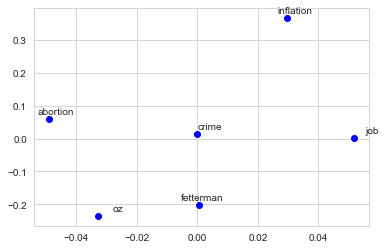

In [19]:
mds_attr_list = ['inflation','abortion','crime','job','fetterman','oz']

from time import sleep
lift_dict = {}
for i in range(len(mds_attr_list)):
    lift_dict[mds_attr_list[i]] = lift(mds_attr_list[i], mds_attr_list,df_temp_tweets,'clean',df_unique_freq)


mds_attr_lift = pd.DataFrame.from_dict(lift_dict)
mds_attr_lift.index = mds_attr_list
# mds_attr_lift

# Take reciprocal of the values
def div(x):
    if x == 'NA':
        return 0
    else:
        return 1/x
df_scaled = mds_attr_lift.applymap(div)

a = df_scaled.to_numpy()

# Applying MDS
from sklearn.manifold import MDS
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

X_scaled = (a - np.min(a))/np.ptp(a)

mds = MDS(2, random_state=0, dissimilarity='precomputed')
X_mds = mds.fit_transform(X_scaled)

#  Plotting MDS
x= X_mds[:,0]
y= X_mds[:,1]

for i in range(len(x)):
    plt.scatter(x[i],y[i],c='blue')
    plt.annotate(
        mds_attr_lift.index[i],
        xy = (x[i], y[i]), xytext = (25, 3),
        textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.show()

We can observe in the MDS plots too and notice the marked closeness between specifically -

* Dr. Oz and Abortion
* Fetterman and Crime

## Task F

## Location

### Calculate the lift values: Contestants vs Location

In [20]:
# This function takes a string, a list, dataframe from which a column with comments is specified and freq_series which has 
# the word unique frequencies and returns lift values of the string with all the values present in the list

def lift(string, string_list,dataf,column,freq_series):
    nrows = float(len(dataf))
    string_n = float(freq_series.loc[string])
    string_mask = dataf[column].str.contains(string)
    lift_list = []
    for items in string_list:
        if string == items:
            lift_list.append('NA')
        else:
            string_list_n = float(freq_series.loc[items])
            mel_count = float(dataf[string_mask][column].str.contains(items).sum())
            lift = (nrows * mel_count)/(string_n * string_list_n)
            lift_list.append(lift)
    
    return lift_list

location_list = ['smalltownpa','bigtownpa']
contestants = ['fetterman','oz']

from time import sleep
lift_dict = {}
for i in range(len(contestants)):
    lift_dict[contestants[i]] = lift(contestants[i], location_list,df_temp_tweets,'clean',df_unique_freq)


location_lift = pd.DataFrame.from_dict(lift_dict)
location_lift.index = location_list
location_lift = location_lift.T
location_lift

,smalltownpa,bigtownpa
fetterman,1.785551,2.618110
oz,2.076961,7.118618


In [21]:
location_dict_temp = location_lift.to_dict()
location_dict = {}
for key in location_dict_temp:
    for k in location_dict_temp[key]:
        location_dict[key + "," +k]=location_dict_temp[key][k]

df_location = pd.DataFrame.from_dict(location_dict, orient='index', columns=['Lift'])
df_location.index

def filter_fn(row, t):
    t = t.split(",")
    if all(x in row['clean_tokenized'] for x in t):
        return True
    else:
        return False
        
def find_sentiment(text):
    m = df_temp_tweets.apply(lambda x: filter_fn(x, text), axis=1)
    df1 = df_temp_tweets[m]

    return df1["Polarity"].mean()

df_location["Polarity"] = df_location.index.map(find_sentiment)
df_location['Sentiment'] = df_location['Polarity'].map(senti)
df_location


,Lift,Polarity,Sentiment
"smalltownpa,fetterman",1.785551,0.203718,Positive
"smalltownpa,oz",2.076961,0.228750,Positive
"bigtownpa,fetterman",2.618110,-0.169840,Negative
"bigtownpa,oz",7.118618,0.062594,Positive


## Task G:
#### Insights basis above Lift Association, Sentiment Analysis and MDS plots -

The top 4 issues highlighted for this election in PA are -
* inflation
* abortion
* crime
* job

Fetterman should focus on “Crime” as an agenda (we could see that in his Lift, MDS associations), which could orient around Gun control and Violence. Primarily there is negative publicity mounted on by “attack ads” and being hammered negatively by Dr. Oz’s team. Public opinion has also linked Fetterman to an incident in 2013 where-in he pulled a shotgun on a black jogger, which could be have severe impacts on the outcome of this election. Additionally, concerns with public safety record and the incidents of violent crime went up under the leadership of Fetterman which further rages up this topic. 
A positive publicity campaign on any issue pertaining to crime or control of gun related incidents will help Fetterman and propel him in a positive light towards a very crucial aspect of the election i.e. Crime.

Oz is portrayed as a “people’s man“ and so does his activities portray him in the same light. He is a regular contributor to “Oprah Winfrey” show and opinion portrays him to be successful in connecting to financially unfortunate people. Additionally, he has fostered activities towards Economy (or job creation to be specific) by spending time with local black entrepreneurs. This could prove pivotal in events leading up to boosting economy, jobs, overall market sentiment, taming inflation and other such concerns.
The concern area which is currently under a negative sentiment is his statement pertaining to Abortion issues (we could see that in his Lift, MDS associations) where-in he had stated in a press conference held in Philadelphia that he would not support criminal penalties for people who sought or doctors who performed abortions. Describing himself as “strongly pro-life,” he added that he supports exceptions for rape, incest, or if the mother’s life is at risk. Oz has faced attack over his statements from the Fetterman’s side.

### Insights on Overall outcome of election –

Despite the fact that Fetterman is favoured to win the election, opinions indicate a narrowing of margins between the two. This can be affirmed by an excerpt from an article too - 
According to the Deluxe version of the FiveThirtyEight forecast, Fetterman’s chances of being the next junior senator from Pennsylvania have diminished, from 83 in 100 as recently as Sept. 24 to 73 in 100 today.
Hence, it will be interesting to drive this outcome basis the insights suggested and hope to see the recommended action.